In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load the dataset to inspect its structure
file_path = (r'C:\Users\Rony\Downloads\Dataset .csv')
data = pd.read_csv(file_path)



In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [19]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [20]:
# Checking missing values in the dataset
missing_values = data.isnull().sum()

# Dropping columns that are unlikely to contribute to prediction
columns_to_drop = [
    "Restaurant ID", "Restaurant Name", "Address", "Locality", "Locality Verbose", "Rating color", "Rating text"
]
data_cleaned = data.drop(columns=columns_to_drop)

# Dropping rows with missing 'Cuisines' as it could be an important predictor
data_cleaned = data_cleaned.dropna(subset=["Cuisines"])

# Encoding categorical variables with one-hot encoding
categorical_columns = [
    "Country Code", "City", "Cuisines", "Currency", 
    "Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu"
]
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Checking the updated dataset shape and column names
data_encoded.shape, data_encoded.columns


((9542, 1997),
 Index(['Longitude', 'Latitude', 'Average Cost for two', 'Price range',
        'Aggregate rating', 'Votes', 'Country Code_14', 'Country Code_30',
        'Country Code_37', 'Country Code_94',
        ...
        'Currency_Indonesian Rupiah(IDR)', 'Currency_NewZealand($)',
        'Currency_Pounds(��)', 'Currency_Qatari Rial(QR)', 'Currency_Rand(R)',
        'Currency_Sri Lankan Rupee(LKR)', 'Currency_Turkish Lira(TL)',
        'Has Table booking_Yes', 'Has Online delivery_Yes',
        'Is delivering now_Yes'],
       dtype='object', length=1997))

In [21]:
print(data.isnull().sum())
data = data.dropna()  # Simple example of removing missing values


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


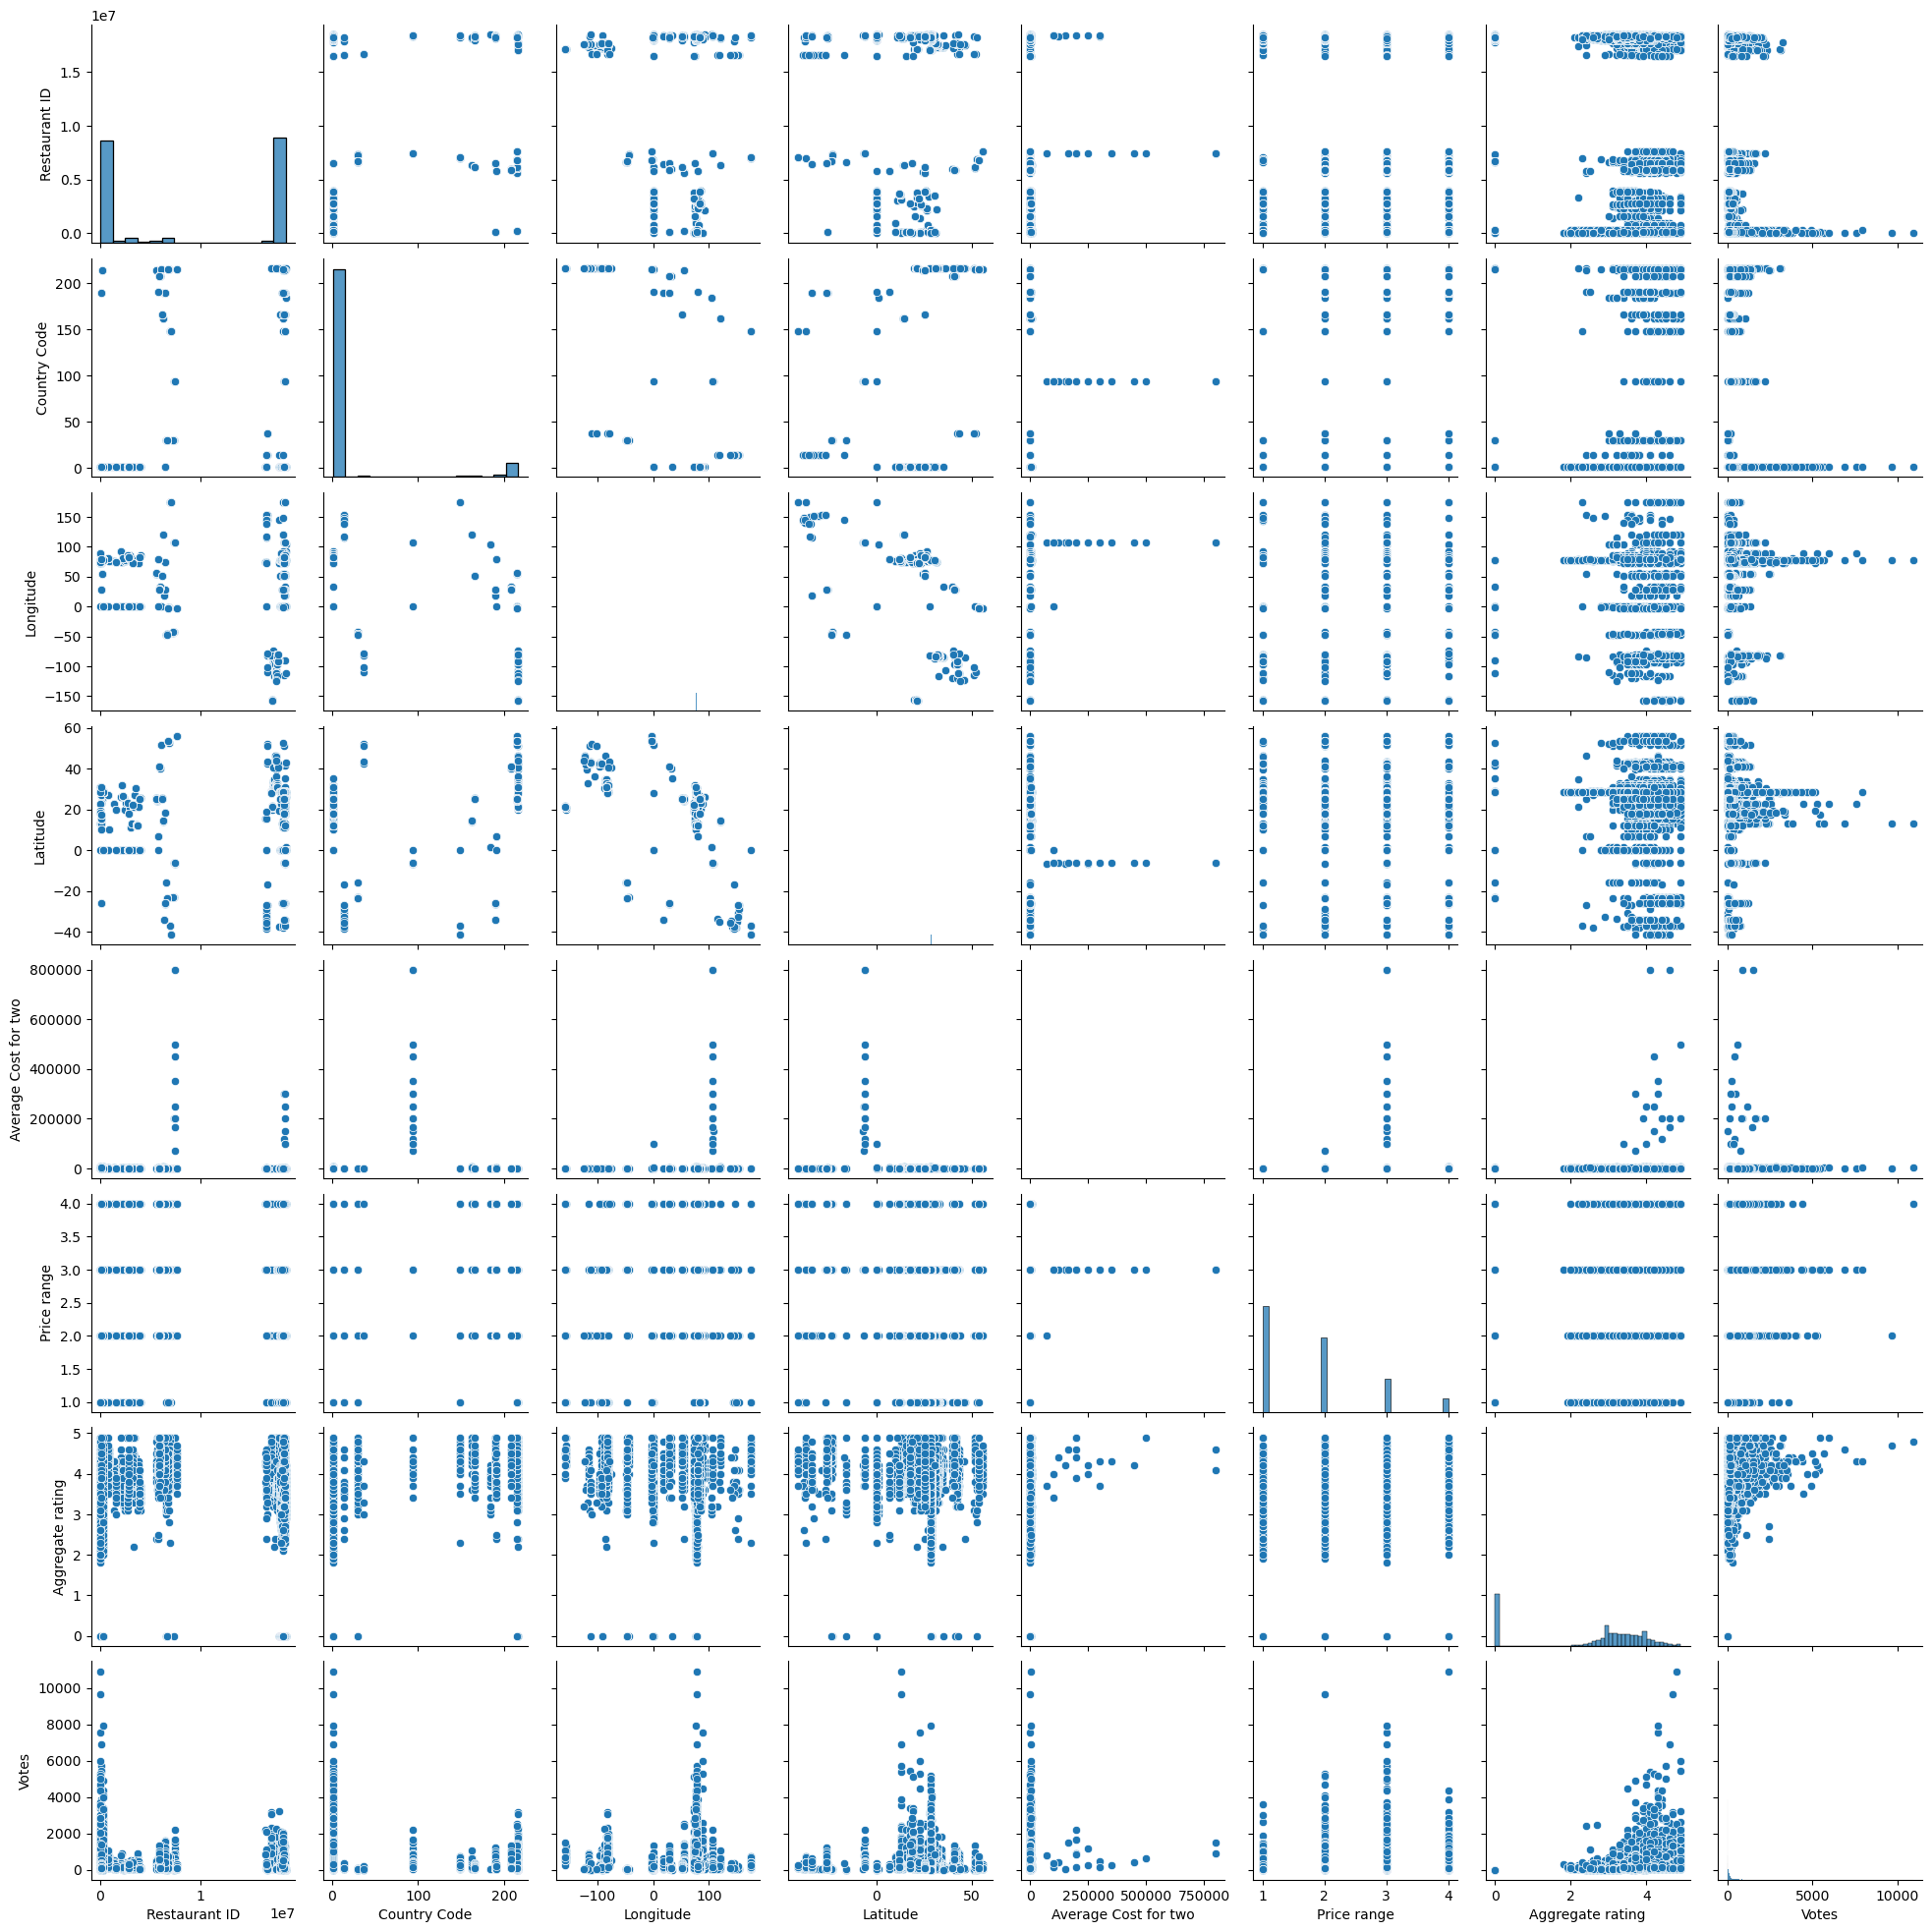

In [22]:
import seaborn as sns
sns.pairplot(data)


In [23]:
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:

# Splitting the dataset into features (X) and target (y)
X = data_encoded.drop(columns=["Aggregate rating"])
y = data_encoded["Aggregate rating"]

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Training and evaluating models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "MSE": mse, "R2 Score": r2}

results


{'Linear Regression': {'MAE': 1.1310148312819077,
  'MSE': 1.9041563429039268,
  'R2 Score': 0.1685023721689891},
 'Decision Tree': {'MAE': 0.26280775275013096,
  'MSE': 0.16592456783656365,
  'R2 Score': 0.927544875677286},
 'Random Forest': {'MAE': 0.19506809848088003,
  'MSE': 0.09083920429544265,
  'R2 Score': 0.9603327829843392}}

### Best performing model: Linear Regression

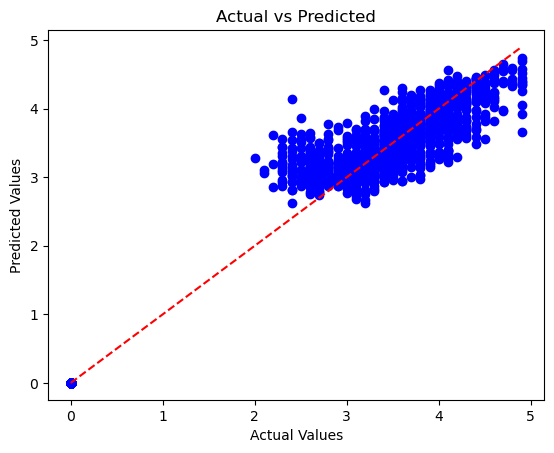

In [25]:
# Visualising the relationship between the actual and the predicted values
plt.scatter(y_test, y_pred, color='blue')

# Corrected line plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
